In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Wczytywanie danych

In [2]:
filenames = {
    'pzu': './pzu_01-06-2010_01-01_2015.csv',
    'pxm': './pxm_01-06-2010_01-01_2015.csv',
    'itg': './itg_01-06-2010_01-01_2015.csv'
}

In [3]:
phase_col_names = ['Zamkniecie']
date_col_name = 'Data'
date_format = '%Y-%m-%d'
usecols = [date_col_name] + phase_col_names

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

def csv_file_to_df(filename):
    assert(len(filename) > 0)
    df = pd.read_csv(filename, parse_dates=[date_col_name], date_parser=dateparse, usecols=usecols)
    return df.set_index(date_col_name)

data_frames = dict(((name, csv_file_to_df(filename)) for name, filename in filenames.items()))
assert(len(data_frames) == 3)

## Wykresy, przedział czasowy od 2011-01-01 do 2015-01-01

Wybrałem ten sam przedział dla wszystkich akcji, bo z jednej strony ułatwiło mi to analizę zmian ich wartość, a z drugiej wg tego, co wyczytałem w Sieci, na polskim rynku optymalnym jest najczęściej horyzont 3-5 razy dłuższy od długości planowanej inwestycji.

In [4]:
figsize = (20, 8)
kind = 'line'

def plot_data_frames(data_frames):
    for name, df in data_frames.items():
        df['Zamkniecie'].plot(kind=kind, figsize=figsize, label=name)
        
plot_data_frames(data_frames)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title("Wartości akcji")
plt.show()

### Średnie stopy zwrotu dla całego rozpatrywanego okresu

In [5]:
def show_pct_changes(data_frames):
    for name, data_frame in data_frames.items():
        print('{}: {}'.format(name, data_frame.pct_change().mean()))
        
show_pct_changes(data_frames)

pzu: Zamkniecie    0.000697
dtype: float64
pxm: Zamkniecie   -0.002111
dtype: float64
itg: Zamkniecie    0.0008
dtype: float64


### Wykresy średnich ruchomych poszczególnych stóp zwrotu

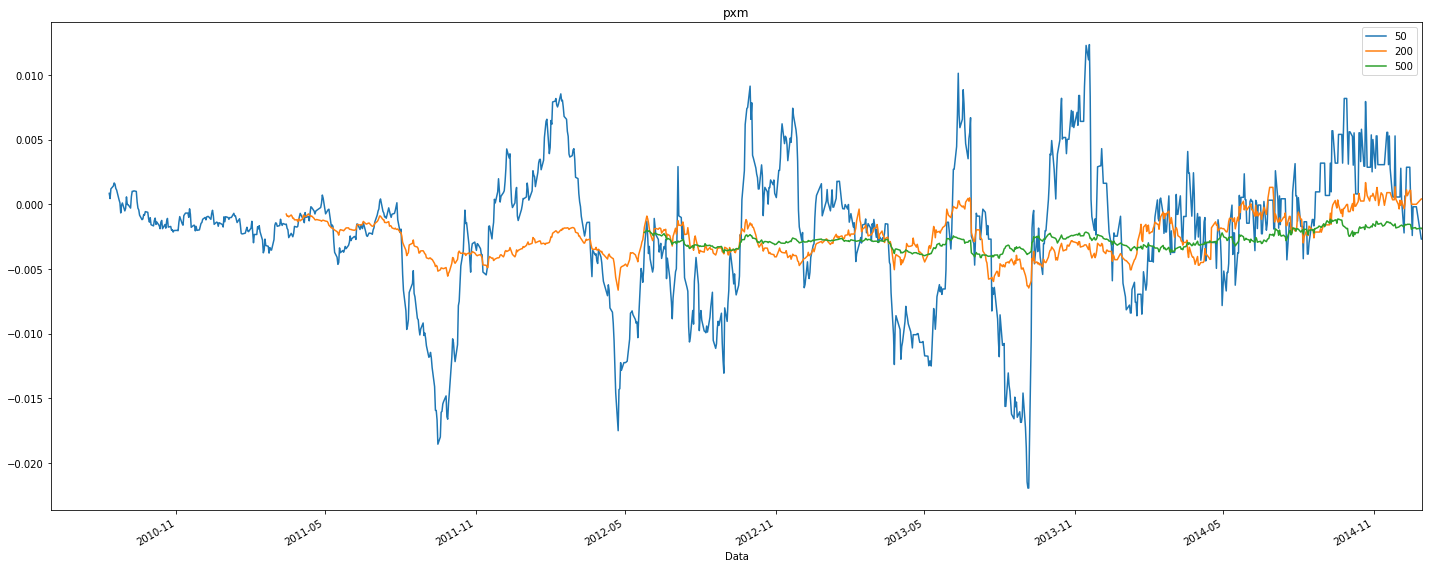

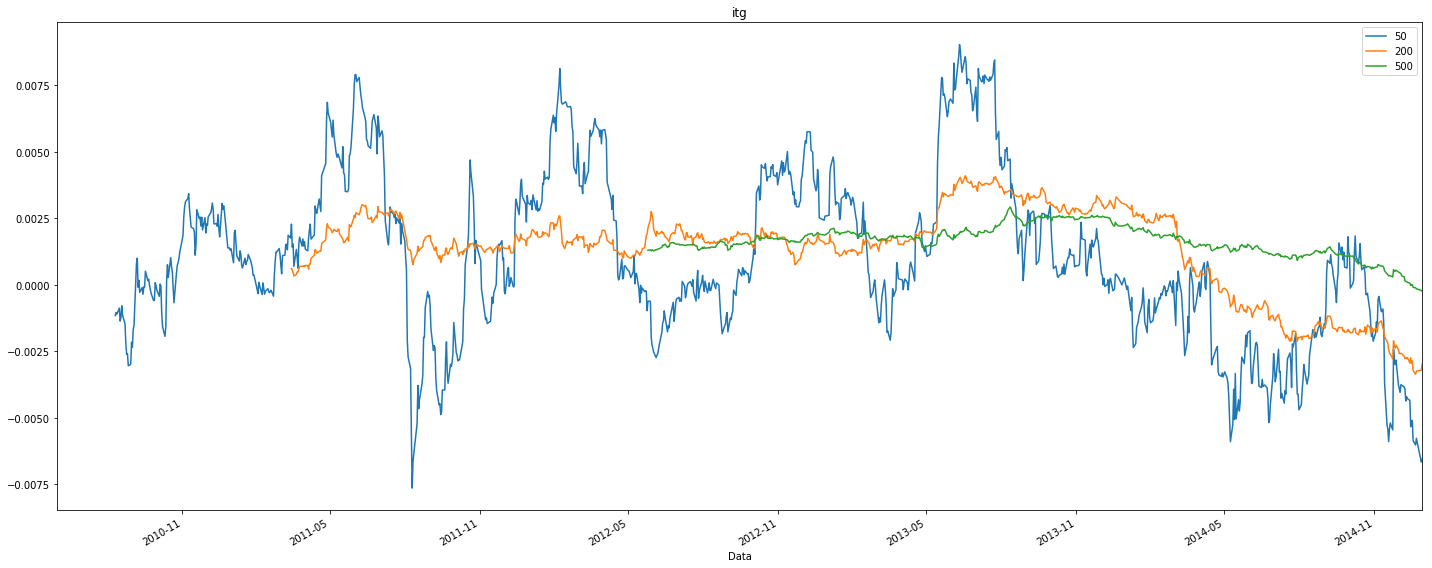

In [6]:
periods = (50, 200, 500)

def plot_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    #data_frame.pct_change().plot()
    for period in periods:
        close.rolling(period, center=False).mean().plot(title=name, figsize=figsize, label='{}'.format(period))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_pct_changes(name, data_frame['Zamkniecie'])

### Wykładnicza średnia ważona dla stóp zwrotu

[0.005]


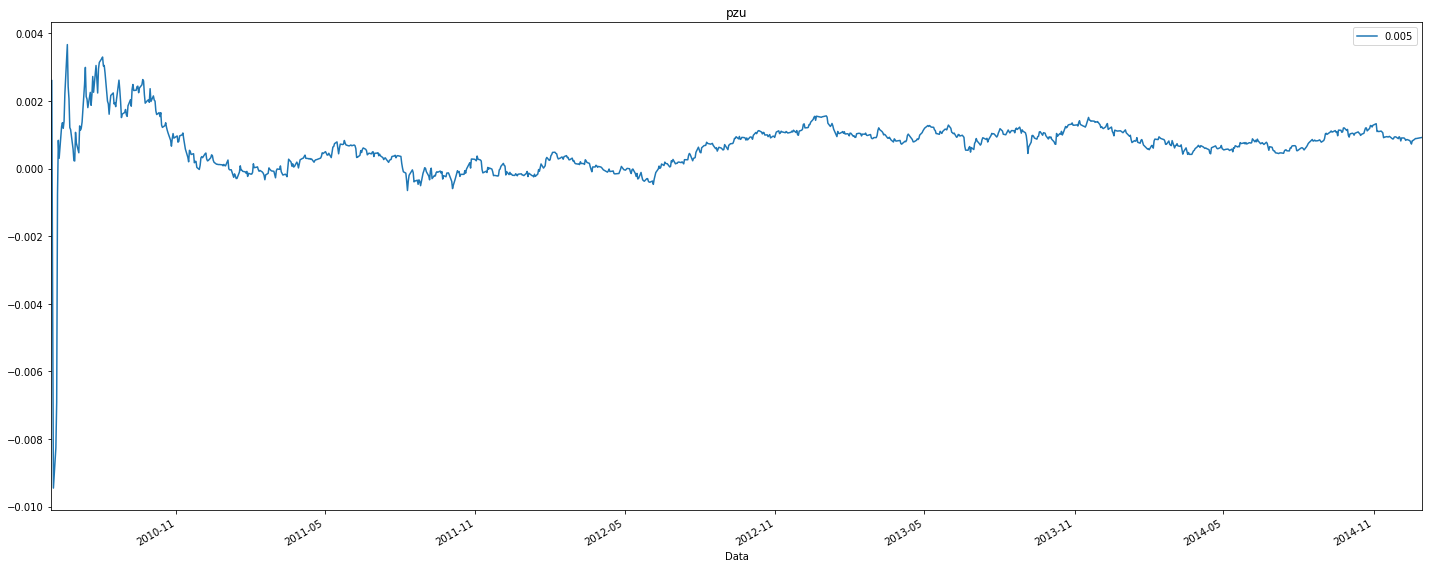

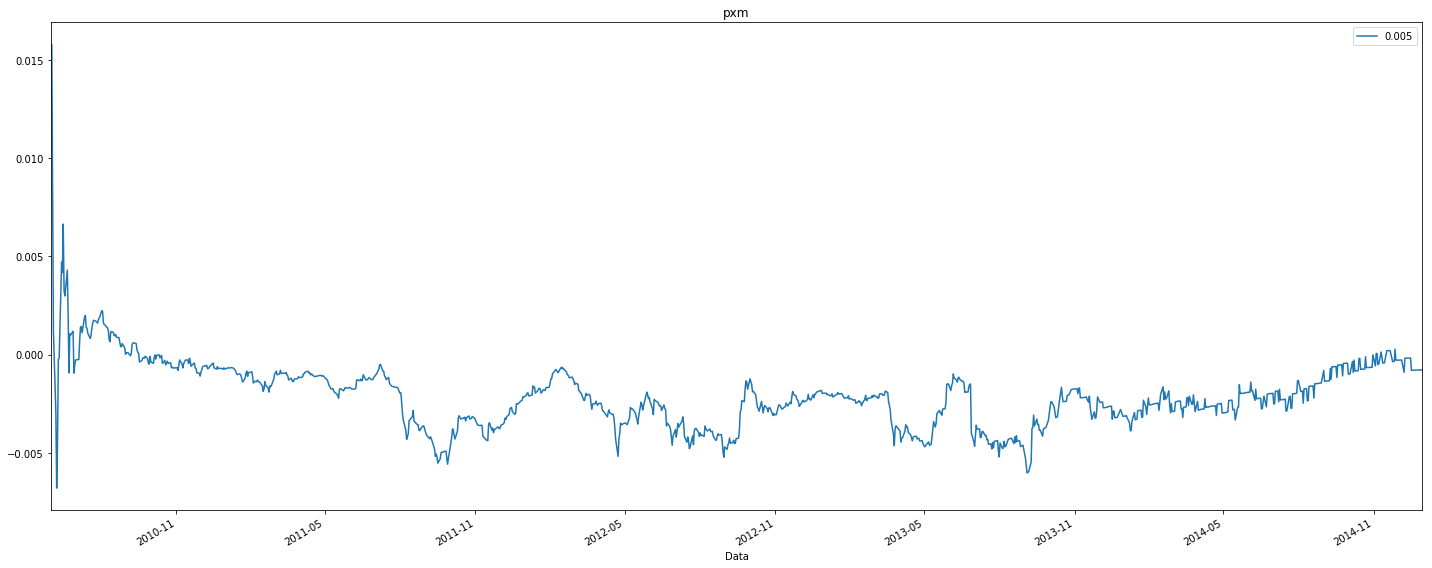

In [7]:
alphas_count = 2
alphas = [0.005]
print(alphas)

def plot_weighted_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    for alpha in alphas:
        close.ewm(alpha=alpha).mean().plot(title=name, figsize=figsize, label='{}'.format(alpha))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_weighted_pct_changes(name, data_frame['Zamkniecie'])

### Analogiczne wykresy ale dla odchyleń standardowych stóp zwrotu (do zweryfikowania)

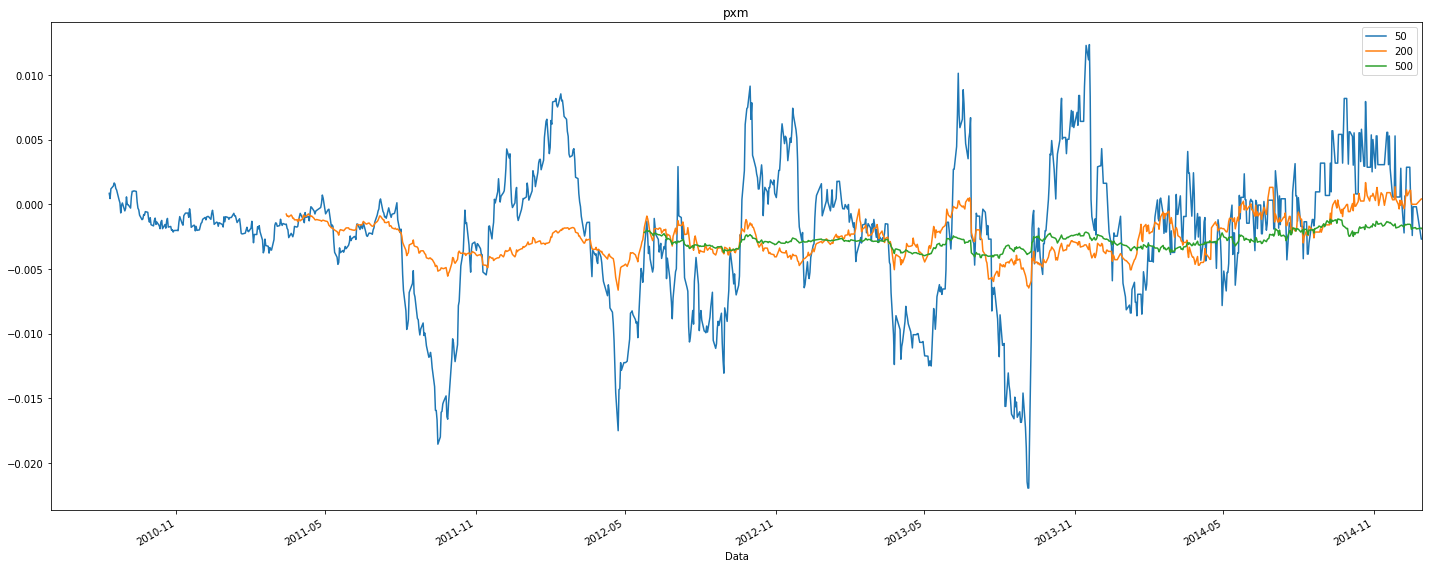

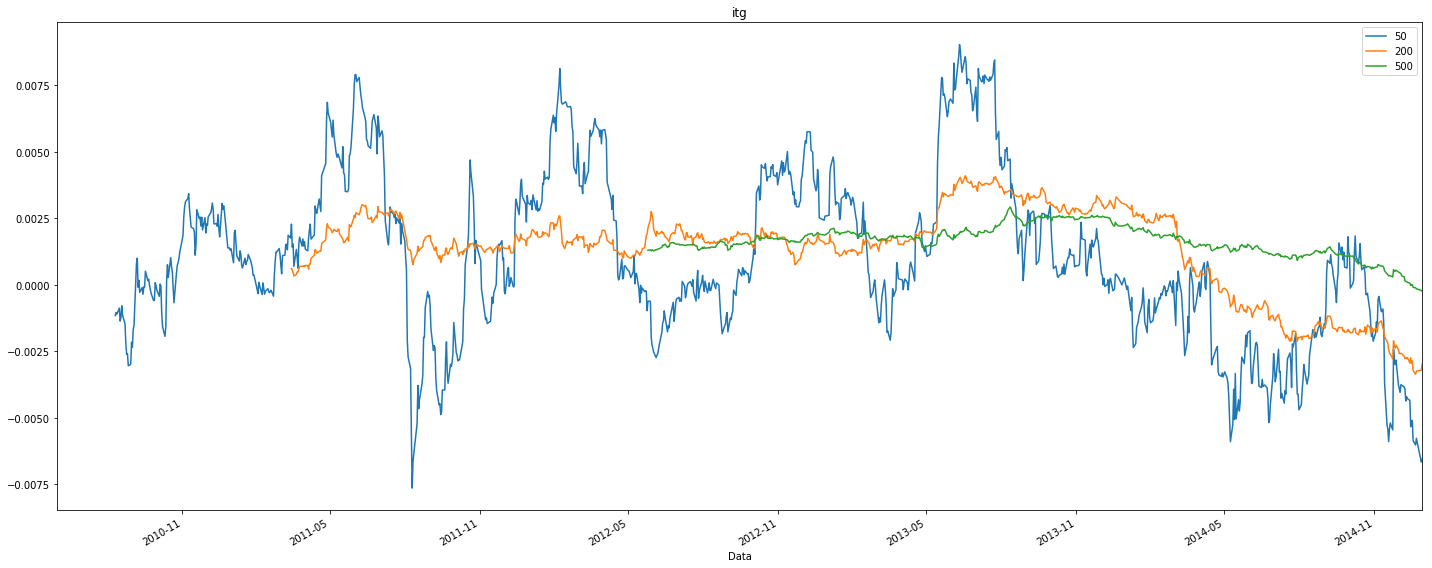

In [8]:
periods = (50, 200, 500)

def plot_std_changes(name, data_frame):
    close = data_frame.pct_change()
    #data_frame.pct_change().plot()
    for period in periods:
        close.rolling(period, center=False).std().plot(title=name, figsize=figsize, label='{}'.format(period))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_pct_changes(name, data_frame['Zamkniecie'])

[0.005]


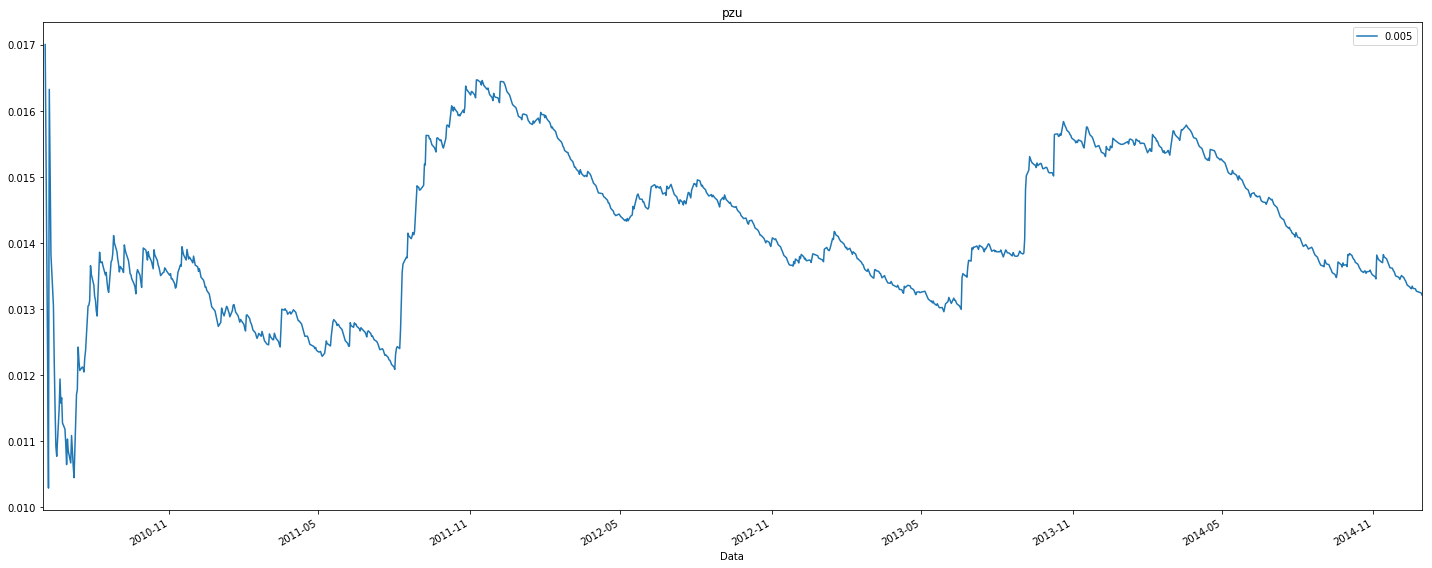

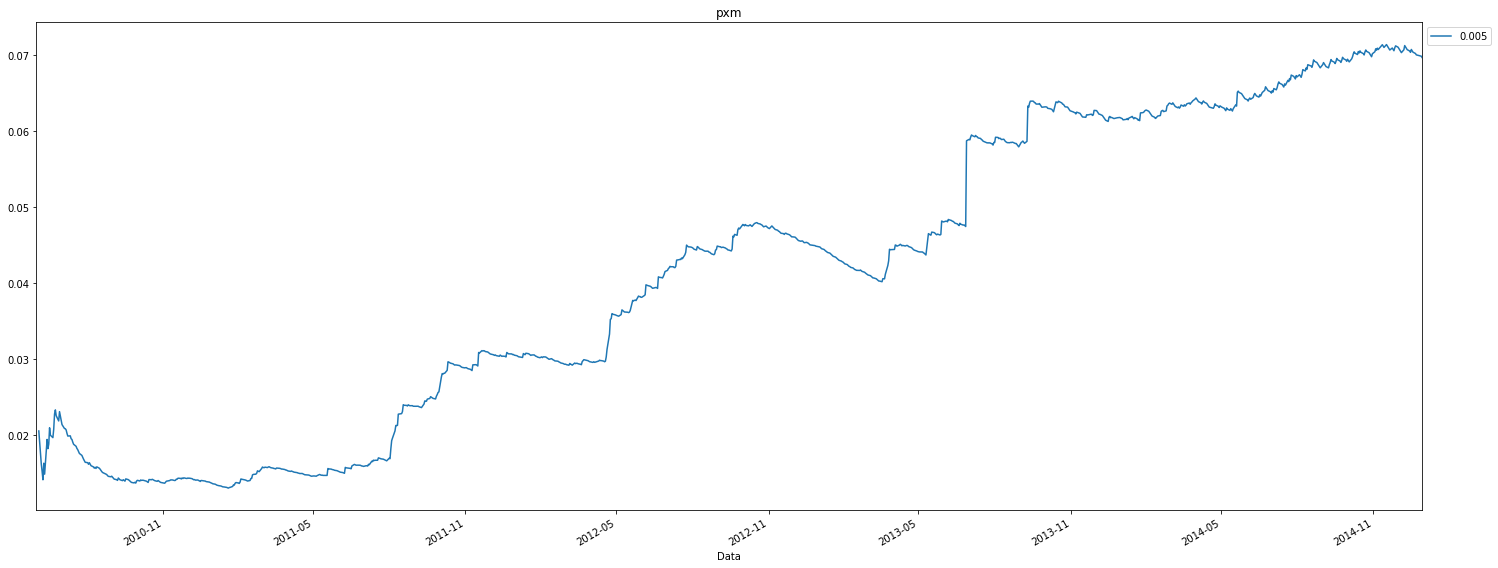

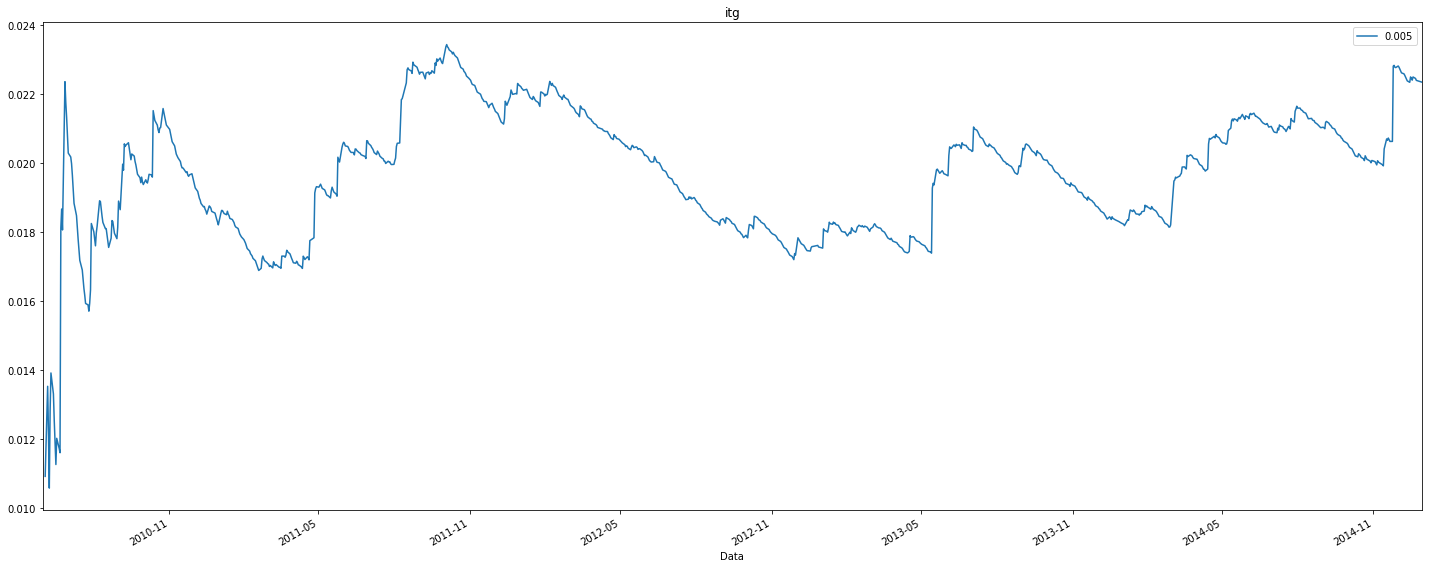

In [9]:
alphas_count = 2
alphas = [0.005]
print(alphas)

def plot_weighted_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    for alpha in alphas:
        close.ewm(alpha=alpha).std().plot(title=name, figsize=figsize, label='{}'.format(alpha))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_weighted_pct_changes(name, data_frame['Zamkniecie'])

In [10]:
#for name, df in data_frames.items():
#    years = list(range(2011, 2015))
#    for year in years:
#        for month in range(1, 12):
#            date = '{}-{}'.format(year, month)
#            print('{} | {}: {}'.format(name, date, df.loc[df.index > date].pct_change().mean()))

In [11]:
def calculate_parameters(data_frames, start_date):
    return {
        name: {
            'return': df.loc[df.index >= start_date].pct_change().mean()[0],
            'risk': df.loc[df.index >= start_date].pct_change().std()[0]
        }
        for name, df in data_frames.items()
    }

dates = ['2010-06-01', '2012-01-01', '2013-01-01']
parameters_per_date = {date: calculate_parameters(data_frames, date) for date in dates}
parameters_per_date

{'2010-06-01': {'itg': {'return': 0.00080020741651272095,
   'risk': 0.020406445393535796},
  'pxm': {'return': -0.0021112308105878221, 'risk': 0.052911820056258968},
  'pzu': {'return': 0.00069663378628620454, 'risk': 0.014154888856642489}},
 '2012-01-01': {'itg': {'return': 0.00060205684979963768,
   'risk': 0.020012443795281346},
  'pxm': {'return': -0.0021640088092547702, 'risk': 0.062956142235460977},
  'pzu': {'return': 0.0010161653822095247, 'risk': 0.013782950873336069}},
 '2013-01-01': {'itg': {'return': -0.00015416447470630756,
   'risk': 0.021761614508568474},
  'pxm': {'return': -0.001934179034105027, 'risk': 0.069020805361035872},
  'pzu': {'return': 0.00066359603577663059, 'risk': 0.014156996668458694}}}

Wykresy frontu dla danych od:
* czerwca 2010
* stycznia 2012
* stycznia 2013

Wybrać obligacje i je uwzględnić w obliczeniach

Porównać stopy zwrotu tygodniowe i miesięczne

# Wykresy akcji na podstawie wyliczonych stóp zwrotu i ryzyk

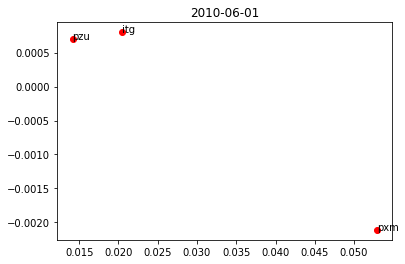

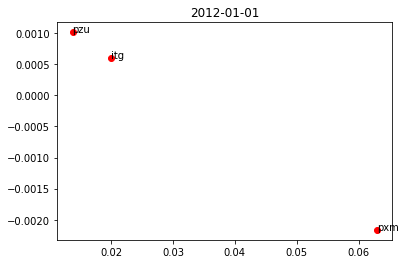

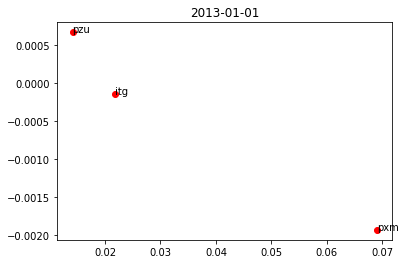

In [12]:
def plot_parameters(parameters_per_date, date):
    parameters = parameters_per_date[date]
    fig, ax = plt.subplots()
    plt.title(date)
    for name, params in parameters.items():
        plt.plot(params['risk'], params['return'], 'ro')
        ax.annotate(name, (params['risk'], params['return']))
    plt.show()

for date in dates:
    plot_parameters(parameters_per_date, date)